# PUBG Finish Placement Prediction

### **Business Understanding:**

---

The **PUBG Finish Placement Prediction** Kaggle competition was posted to "create a model which predicts players' finishing placement based on their final stats." This competition utilized publicly available official game data from PUBG through the PUBG Developer API. The questions of interest (QOI) were about the best strategy to win in PUBG, the best skillset, and to be able to model ranking in-game. The dataset provided was a breakdown of post-game metrics and percentile winning placement: with 4446966 records and 29 total features.

https://www.kaggle.com/c/pubg-finish-placement-prediction/data

Our first response to predict is a continuous variable (*i.e.* the value of percentile winning placement). Our evaluation will require a regression model analyzing the mean-squared error (MSE) in combination with 10-fold cross-validation. Consequently, this was the same metric for the kaggle competition's QOI.

Creating forecasting algorithms for online sports is not new. Therefore, an additional task could be related to optimizing a sports betting algorithm using odds ratio for binary classification. [talk about best metric to evaluate odds ratio... accuracy, sensitivity, specificity]

In [5]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [6]:
pubg_raw = pd.read_csv("train_V2.csv")

### **SIMPLE STATISTICS:**

Because most of our data is continuous (either integers or floats), a large amount of our data can be evaluated for simple statistical measures.

The following is the full list. We'll analyze the following:

In [7]:
pubg_raw.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [8]:
pubg_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### **DATA QUALITY:**

As presented in the following code snippet, our dataset appears dense rather than sparse. There is only one missing value and it is in our first response variable (additional detail for the NA provided below).



In [9]:
# check for misssing values
colname = list(pubg_raw.columns)

for i in range(len(pubg_raw.columns)):
  count = pubg_raw[pubg_raw.columns[i]].isna().sum()
  print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'Id' has 0 NAs
Column 'groupId' has 0 NAs
Column 'matchId' has 0 NAs
Column 'assists' has 0 NAs
Column 'boosts' has 0 NAs
Column 'damageDealt' has 0 NAs
Column 'DBNOs' has 0 NAs
Column 'headshotKills' has 0 NAs
Column 'heals' has 0 NAs
Column 'killPlace' has 0 NAs
Column 'killPoints' has 0 NAs
Column 'kills' has 0 NAs
Column 'killStreaks' has 0 NAs
Column 'longestKill' has 0 NAs
Column 'matchDuration' has 0 NAs
Column 'matchType' has 0 NAs
Column 'maxPlace' has 0 NAs
Column 'numGroups' has 0 NAs
Column 'rankPoints' has 0 NAs
Column 'revives' has 0 NAs
Column 'rideDistance' has 0 NAs
Column 'roadKills' has 0 NAs
Column 'swimDistance' has 0 NAs
Column 'teamKills' has 0 NAs
Column 'vehicleDestroys' has 0 NAs
Column 'walkDistance' has 0 NAs
Column 'weaponsAcquired' has 0 NAs
Column 'winPoints' has 0 NAs
Column 'winPlacePerc' has 1 NAs


In [10]:
pubg_raw[pubg_raw.isna().any(axis = 1)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


This particular *NA* response value appears to be due to a solo-fpp match (solo first person shooter) without any competitors. This evaluation is supported by the match only lasting 9 seconds (under *matchDuration*) and *numGroups* having a value of 1.

Because this cannot produce an appropriate evaluation metric for determining win place percentage, we will proceed to drop this record.

In [11]:
pubg_raw = pubg_raw.dropna()
pubg_raw.isnull().values.any()

False

In [12]:
# checking for outliers = headshotKills
# there are a few records that could be misleading due to cheating

pubg_raw.loc[:,'headshotKills'].value_counts()
## recommend removing records with >10 headshotKills

0     3696115
1      574741
2      126348
3       32975
4        9962
5        3616
6        1439
7         757
8         373
9         215
10        136
11         79
12         64
13         44
14         23
15         16
16         15
17         11
18          9
19          3
23          3
20          3
26          3
31          2
34          2
27          2
21          2
41          1
64          1
40          1
39          1
46          1
42          1
35          1
Name: headshotKills, dtype: int64

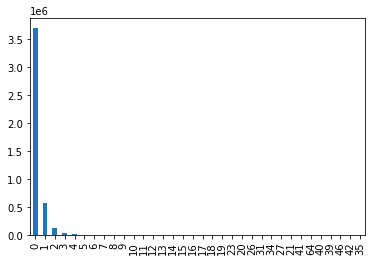

In [13]:
# plot of headshotKills\ 
ax = pubg_raw.loc[:,'headshotKills'].value_counts().plot(kind='bar')

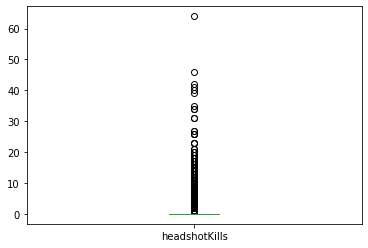

In [14]:
ax = pubg_raw.loc[:, 'headshotKills'].plot(kind='box')

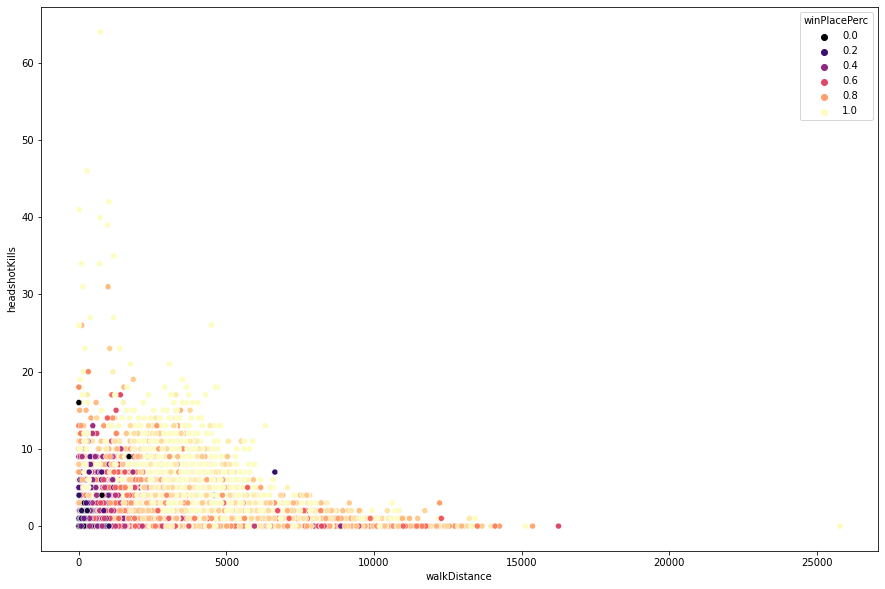

In [15]:
plt.figure(figsize = (15, 10))
sns.scatterplot(data = pubg_raw, x = "walkDistance", y = "headshotKills", hue = "winPlacePerc", sizes = (20, 200), palette = "magma")
plt.show()

In [16]:
# Potential Cheating
pntlCheating = pubg_raw[["walkDistance", "headshotKills", "winPlacePerc", "matchType"]]
pntlCheating[(pntlCheating["walkDistance"] < 500) & 
             (pntlCheating["winPlacePerc"] >= 0.65) & 
             (pntlCheating["headshotKills"] > 10)].sort_values(by = "walkDistance", ascending = True)

,walkDistance,headshotKills,winPlacePerc,matchType
954479,0.000,16,1.0000,normal-squad-fpp
1893305,0.000,11,0.6667,normal-solo-fpp
1452615,0.000,12,1.0000,normal-solo-fpp
425984,0.000,18,1.0000,normal-squad-fpp
3701105,0.000,12,1.0000,normal-solo
3057746,0.000,18,0.7500,normal-squad-fpp
1702541,0.000,11,1.0000,normal-squad-fpp
1368181,0.000,13,0.7222,normal-solo-fpp
1955074,0.000,16,1.0000,normal-squad-fpp
2998470,0.000,26,1.0000,normal-solo-fpp


## **DATA TYPE MEANING:**

The first three attributes—*Id*, *groupID*, and *matchID*—are alpha-numeric identifiers for the players, the teams/groups, and the individual matches that players participated in. These are stored as objects but could also be identified as strings.

The variables of type integer are *assists*, *boosts*, *DBNO*s, *headshotKills*, *heals*, *killPlace*, *killPoints*, *kills*, *killStreaks*, *matchDuration*, *maxPlace*, *numGroups*, *rankPoints*, *revives*, *roadKills*, *teamKills*, *vehicleDestroys*, *weaponsAcquired*, and *winPoints*.

If we were to one-hot-encode the *matchType* feature, we'd need to include 16 additional columns for the categories contained in *matchType*.

In [17]:
# df = pubg_raw.drop(columns = ["Id", "groupId", "matchId"], axis = 1)
df = pubg_raw
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [26]:
dfDup = df.drop_duplicates(subset = ["groupId"])
print(dfDup.groupby("matchType")["Id"].nunique())
print("             ")
print("Number of distinct " + "\033[1m" + "matchType" + "\x1B[0m" + " is {}".format(dfDup.groupby("matchType")["Id"].nunique().count()))

matchType
crashfpp              3130
crashtpp               180
duo                 152324
duo-fpp             486491
flarefpp               200
flaretpp               695
normal-duo             101
normal-duo-fpp        2815
normal-solo            232
normal-solo-fpp       1227
normal-squad           124
normal-squad-fpp      3950
solo                168577
solo-fpp            523457
squad               177080
squad-fpp           506161
Name: Id, dtype: int64
             
Number of distinct matchType is 16


array([[<AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'boosts'}>,
        <AxesSubplot:title={'center':'damageDealt'}>,
        <AxesSubplot:title={'center':'DBNOs'}>,
        <AxesSubplot:title={'center':'headshotKills'}>],
       [<AxesSubplot:title={'center':'heals'}>,
        <AxesSubplot:title={'center':'killPlace'}>,
        <AxesSubplot:title={'center':'killPoints'}>,
        <AxesSubplot:title={'center':'kills'}>,
        <AxesSubplot:title={'center':'killStreaks'}>],
       [<AxesSubplot:title={'center':'longestKill'}>,
        <AxesSubplot:title={'center':'matchDuration'}>,
        <AxesSubplot:title={'center':'maxPlace'}>,
        <AxesSubplot:title={'center':'numGroups'}>,
        <AxesSubplot:title={'center':'rankPoints'}>],
       [<AxesSubplot:title={'center':'revives'}>,
        <AxesSubplot:title={'center':'rideDistance'}>,
        <AxesSubplot:title={'center':'roadKills'}>,
        <AxesSubplot:title={'center':'swimDistance'}>,
       

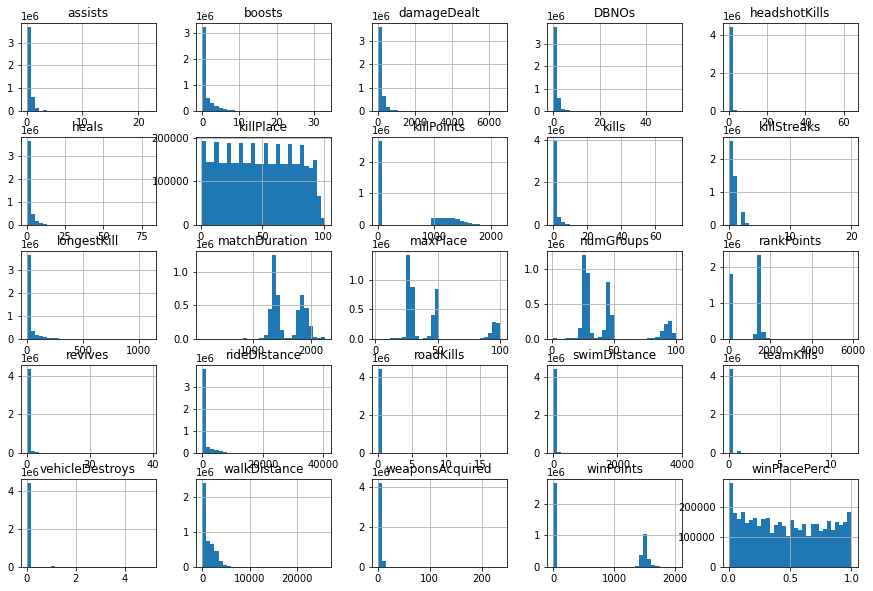

In [19]:
# evaluating outliers
pubg_raw.hist(bins=30, figsize = (15, 10))

<AxesSubplot:>

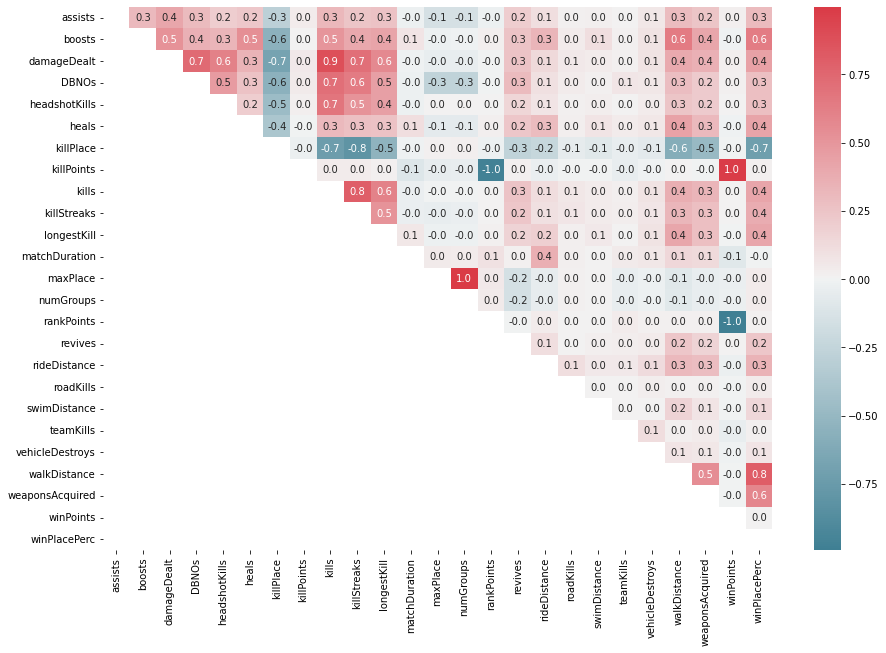

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize = (15, 10))
corrMatrix = pubg_raw.corr()
sns.heatmap(corrMatrix, ax = ax, annot = True, fmt = ".1f", cmap = cmap, mask=np.tril(np.ones_like(corrMatrix, dtype=bool)))

In [21]:
c = df.corr()["winPoints"].abs()
round(c.sort_values(ascending = False).head(7), 4)

winPoints        1.0000
rankPoints       0.9938
killPoints       0.9834
matchDuration    0.0874
teamKills        0.0409
maxPlace         0.0293
rideDistance     0.0278
Name: winPoints, dtype: float64

In [22]:
s = df.corr()["winPlacePerc"].abs()
round(s.sort_values(ascending = False).head(10), 4)

winPlacePerc       1.0000
walkDistance       0.8109
killPlace          0.7191
boosts             0.6342
weaponsAcquired    0.5838
damageDealt        0.4405
heals              0.4279
kills              0.4199
longestKill        0.4102
killStreaks        0.3776
Name: winPlacePerc, dtype: float64

In [23]:
k = df.corr()["killPoints"].abs()
round(k.sort_values(ascending = False).head(7), 4)

killPoints       1.0000
winPoints        0.9834
rankPoints       0.9756
matchDuration    0.0995
damageDealt      0.0499
maxPlace         0.0448
DBNOs            0.0426
Name: killPoints, dtype: float64

In [24]:
df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
df['killsAssist'] = df['kills'] + df['assists']
df['totalItems'] = df['heals'] + df['boosts'] + df['weaponsAcquired']
df['healItems'] = df['heals'] + df['boosts']
df['MMR'] = df['killPoints'] + df['winPoints'] # + df['rankPoints'] <- may take out rank points as it depends on killPoints & winPoints

In [25]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsAssist,totalItems,healItems,MMR
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01,1.764843e+03,1.158599e+00,6.137544e+00,2.477055e+00,1.111466e+03
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01,2.183117e+03,1.833479e+00,5.346595e+00,3.879985e+00,1.361564e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01,1.581000e+02,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01,7.882000e+02,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01,2.728459e+03,2.000000e+00,9.000000e+00,4.000000e+00,2.659000e+03
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00,4.127010e+04,8.500000e+01,2.390000e+02,8.100000e+01,4.023000e+03


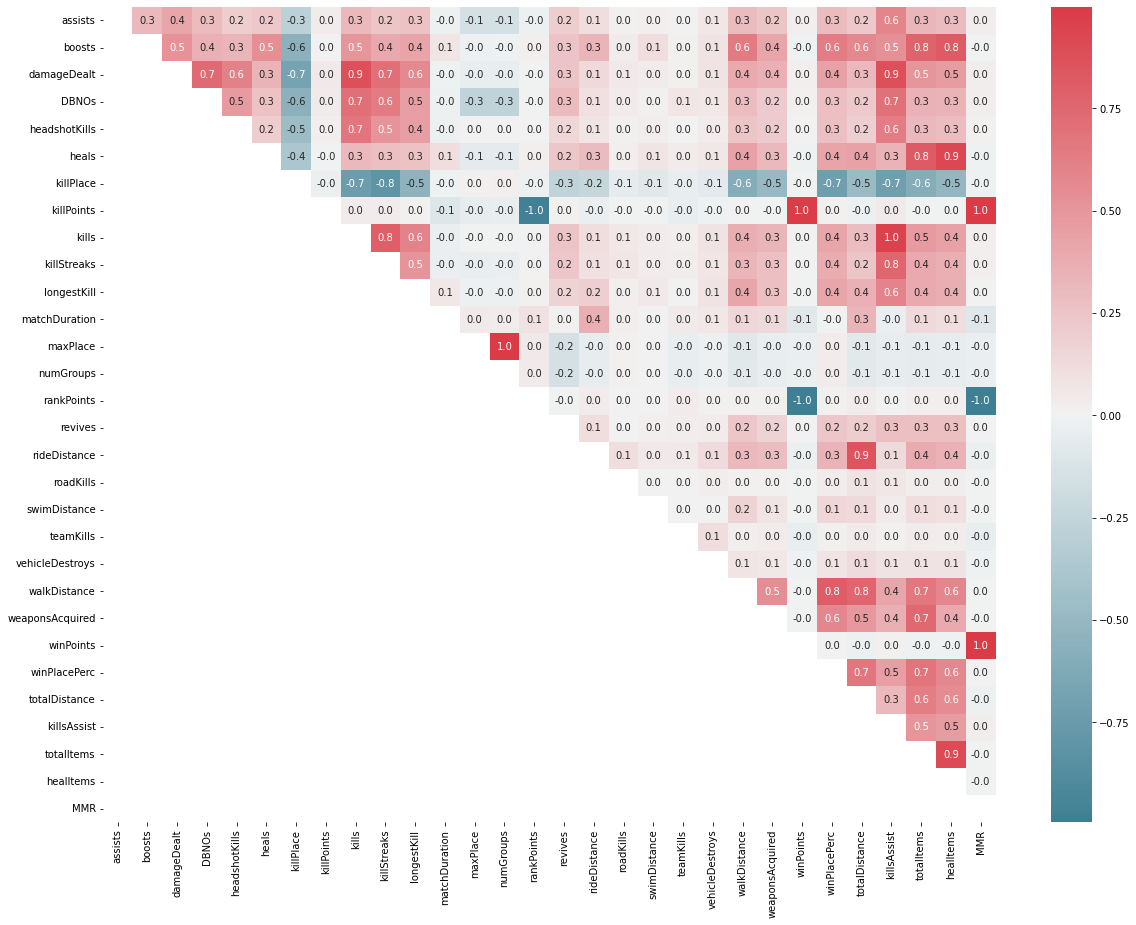

In [27]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), 
            ax = ax, 
            annot = True, 
            fmt = ".1f", 
            cmap = cmap,
            mask = np.tril(np.ones_like(df.corr(), dtype = bool)))

plt.show()

In [28]:
# Variables above 0.4 correlation with winPlacePerc
s = df.corr()["winPlacePerc"].abs()
round(s.sort_values(ascending = False).head(10), 4)
feature = abs(df.corr()["winPlacePerc"][abs(df.corr()["winPlacePerc"]) > 0.4]).index.tolist()
feature

['boosts',
 'damageDealt',
 'heals',
 'killPlace',
 'kills',
 'longestKill',
 'walkDistance',
 'weaponsAcquired',
 'winPlacePerc',
 'totalDistance',
 'killsAssist',
 'totalItems',
 'healItems']

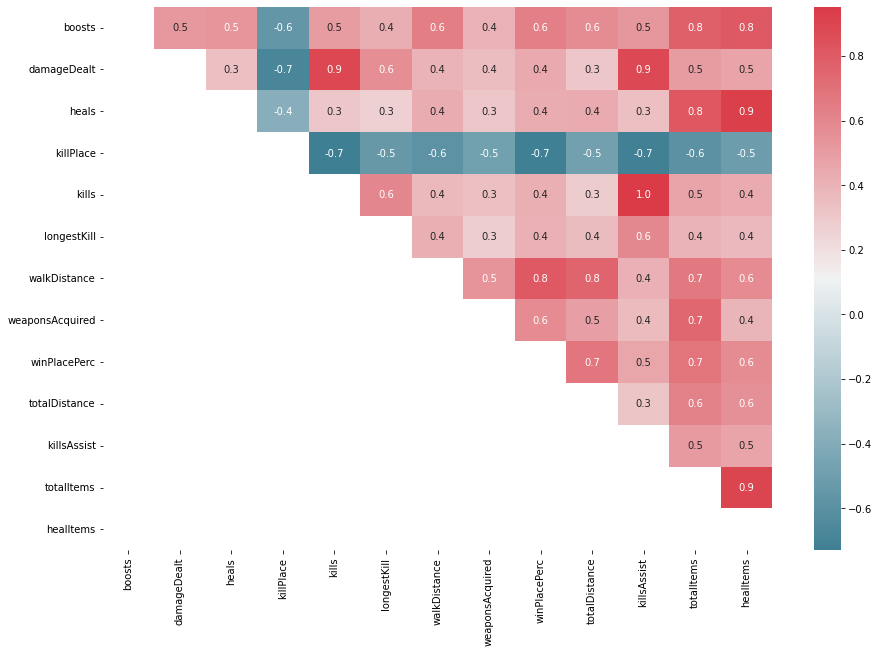

In [29]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df[feature].corr(), 
            ax = ax, 
            annot = True, 
            fmt = ".1f", 
            cmap = cmap,
            mask = np.tril(np.ones_like(df[feature].corr(), dtype = bool)))

plt.show()

<Figure size 1080x720 with 0 Axes>

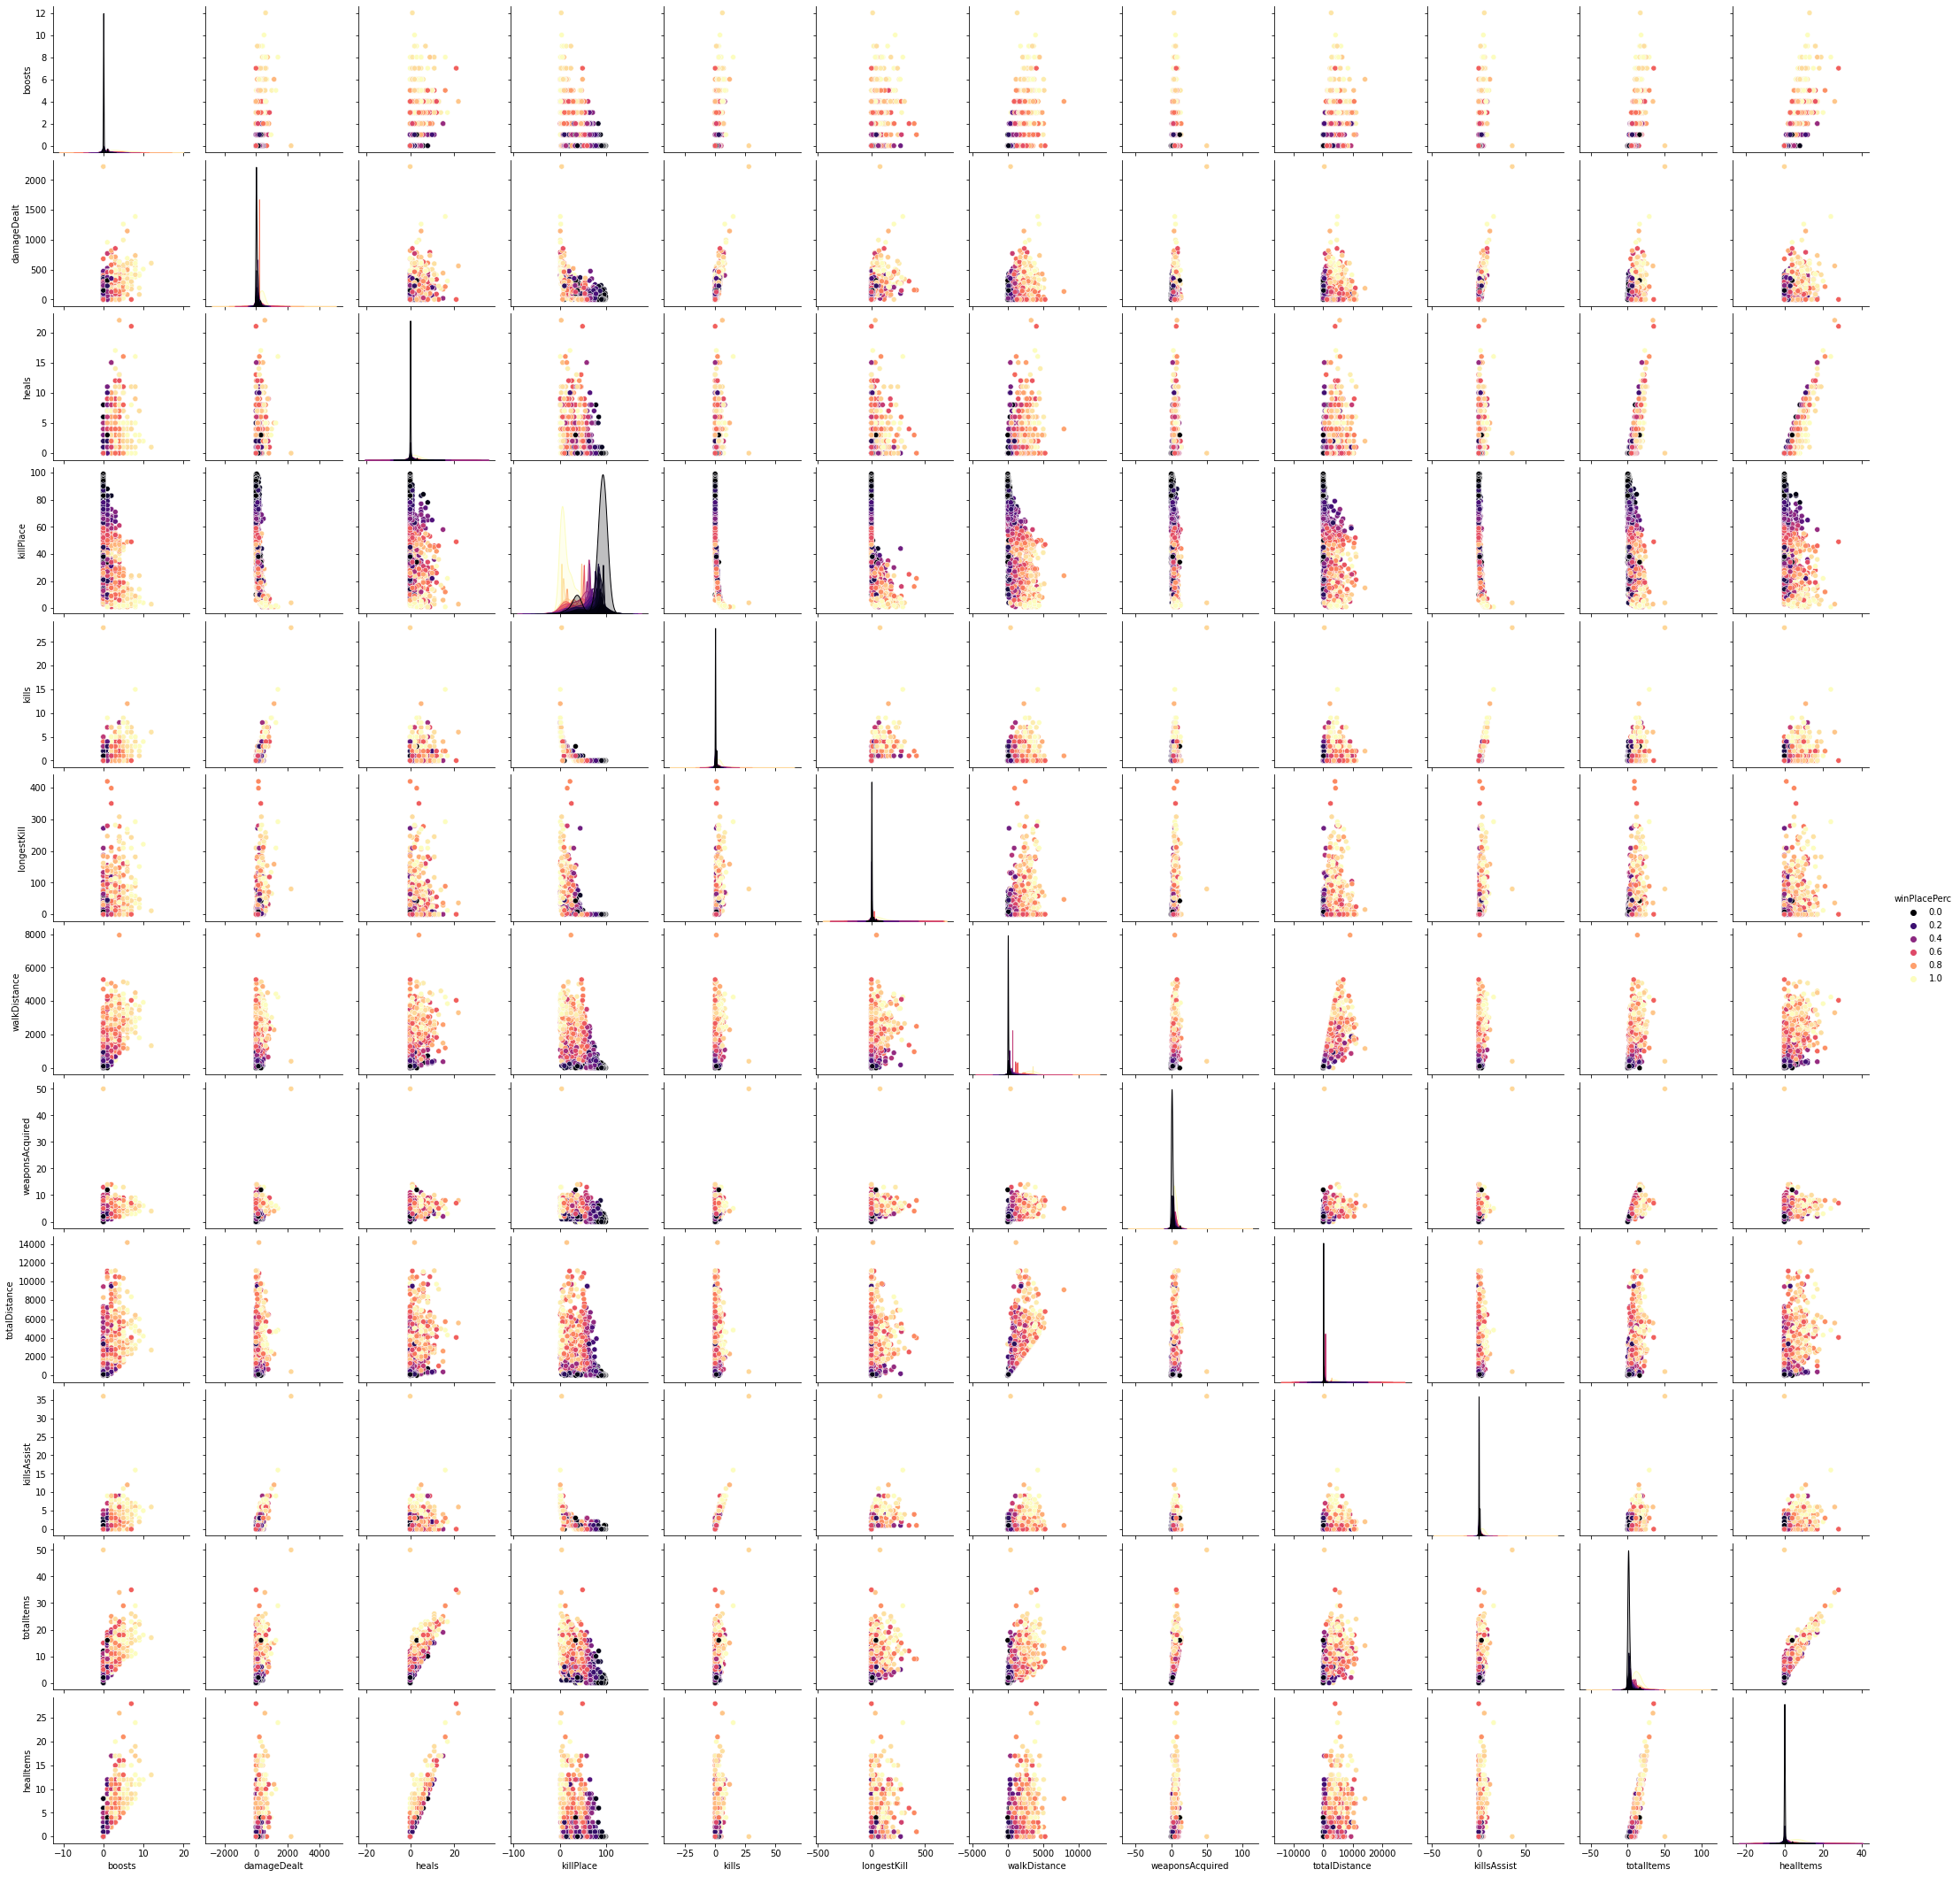

In [30]:
plt.figure(figsize = (15, 10))
sns.pairplot(df[feature].sample(1500), 
             hue = "winPlacePerc",
             palette = "magma")
plt.show()

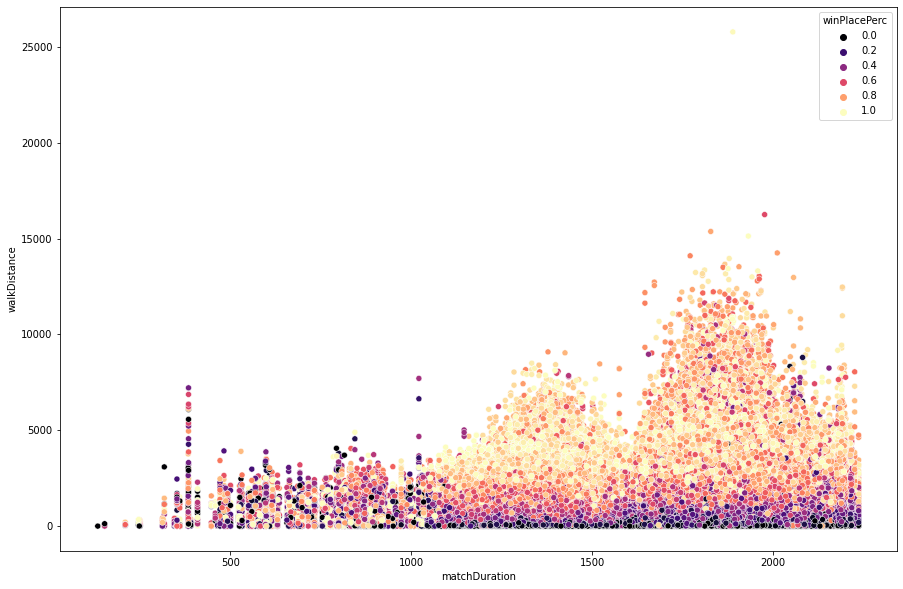

In [31]:
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df, x = "matchDuration", y = "walkDistance", hue = "winPlacePerc", sizes = (20, 200), palette = "magma")
plt.show()

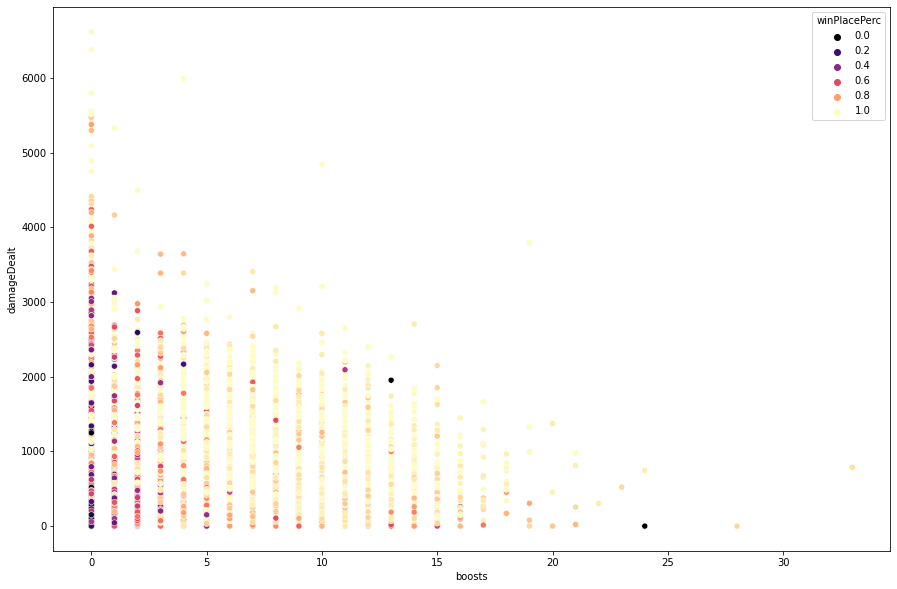

In [32]:
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df, x = "boosts", y = "damageDealt", hue = "winPlacePerc", palette = "magma")
plt.show()

# results look as expected - more damageDelt goes with lower winPlacePerc 
# lower is better for winPlacePerc 

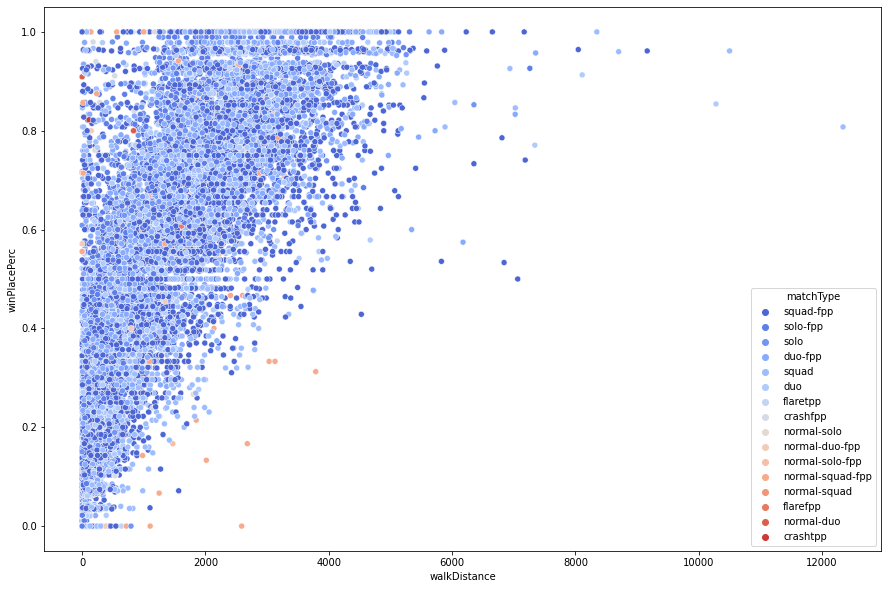

In [33]:
# Overwhleming numbers of Rank Mode Games compare to other Game Mode.
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df.sample(20000), x = "walkDistance", y = "winPlacePerc", 
                hue = "matchType",
                palette = "coolwarm")
plt.show()

In [34]:
def matchType(df):

    options = ["all", "event", "nonevent", "rank", "normal", "include", "exclude", "fpp", "tpp"]

    while True:
        print("Game Mode options are All, Event, NonEvent, Rank, Normal")
        print("--------------------------------------------------------")
        E = str(input("Game Mode: ")).lower()
        if E in options:
            break

    if E == "all":
        output = df
    elif E == "event":
        output = df.loc[df["matchType"].str.contains("crash|flare", case = True)]
    elif E == "rank":
        output = df.loc[~df["matchType"].str.contains("crash|flare|normal", case = True)]
    elif E == "nonevent":
        output = df.loc[~df["matchType"].str.contains("crash|flare", case = True)]
    else:
        output = df.loc[df["matchType"].str.contains("normal", case = True)]

    
    while True:
        print("             ")
        print("Game Type options are All, FPP, TPP")
        print("--------------------------------------------------------")
        F = str(input("Game Type: ")).lower()
        if F in options:
            break

    print("             ")
    if F == "fpp":
        output = output.loc[output["matchType"].str.contains("fpp", case = True)]
    elif F == "tpp":
        output = output.loc[~output["matchType"].str.contains("fpp", case = True)]
    else:
        output


    return output

In [35]:
eventMode = matchType(df)
eventMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: event
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: all
             


matchType
crashfpp    6287
crashtpp     371
flarefpp     718
flaretpp    2505
Name: Id, dtype: int64

In [36]:
normalMode = matchType(df)
normalMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: normal
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: all
             


matchType
normal-duo            199
normal-duo-fpp       5489
normal-solo           326
normal-solo-fpp      1682
normal-squad          516
normal-squad-fpp    17174
Name: Id, dtype: int64

In [37]:
normalFPPMode = matchType(df)
normalFPPMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: normal
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: fpp
             


matchType
normal-duo-fpp       5489
normal-solo-fpp      1682
normal-squad-fpp    17174
Name: Id, dtype: int64

In [38]:
rankMode = matchType(df)
rankMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: rank
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: all
             


matchType
duo           313591
duo-fpp       996691
solo          181943
solo-fpp      536761
squad         626526
squad-fpp    1756186
Name: Id, dtype: int64

In [39]:
rankFPPMode = matchType(df)
rankFPPMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: rank
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: fpp
             


matchType
duo-fpp       996691
solo-fpp      536761
squad-fpp    1756186
Name: Id, dtype: int64

In [41]:
rankTPPMode = matchType(df)
rankTPPMode.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: rank
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: tpp
             


matchType
duo      313591
solo     181943
squad    626526
Name: Id, dtype: int64

In [42]:
nonEventModeFPP = matchType(df)
nonEventModeFPP.groupby("matchType")["Id"].nunique()

Game Mode options are All, Event, NonEvent, Rank, Normal
--------------------------------------------------------
Game Mode: nonevent
             
Game Type options are All, FPP, TPP
--------------------------------------------------------
Game Type: fpp
             


matchType
duo-fpp              996691
normal-duo-fpp         5489
normal-solo-fpp        1682
normal-squad-fpp      17174
solo-fpp             536761
squad-fpp           1756186
Name: Id, dtype: int64

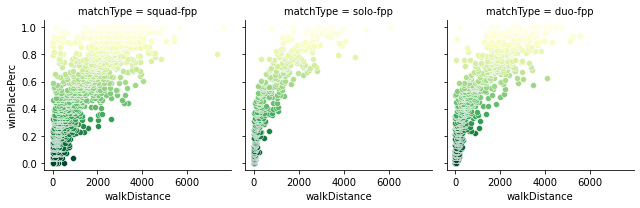

In [43]:
# Comparing "winPlacePerc" by "matchType"
g = sns.FacetGrid(rankFPPMode.sample(2500), col = "matchType", hue = "winPlacePerc", palette = "YlGn_r")
g.map(sns.scatterplot, "walkDistance", "winPlacePerc")

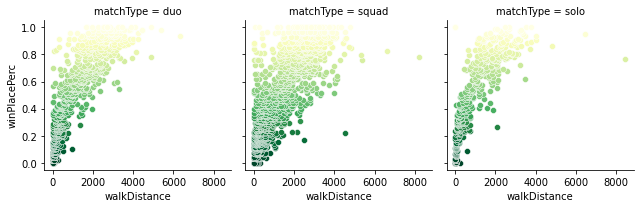

In [44]:
g = sns.FacetGrid(rankTPPMode.sample(2500), col = "matchType", hue = "winPlacePerc", palette = "YlGn_r")
g.map(sns.scatterplot, "walkDistance", "winPlacePerc")

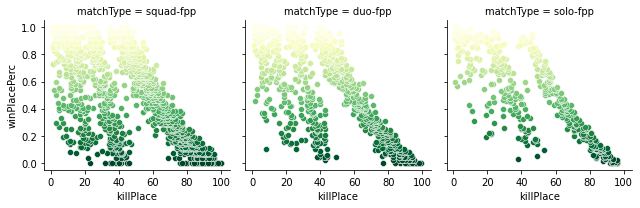

In [45]:
g = sns.FacetGrid(rankFPPMode.sample(2500), col = "matchType", hue = "winPlacePerc", palette = "YlGn_r")
g.map(sns.scatterplot, "killPlace", "winPlacePerc")

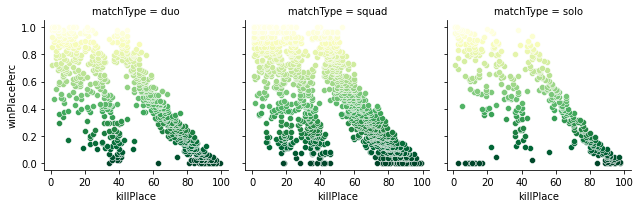

In [46]:
g = sns.FacetGrid(rankTPPMode.sample(2500), col = "matchType", hue = "winPlacePerc", palette = "YlGn_r")
g.map(sns.scatterplot, "killPlace", "winPlacePerc")